Imports

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib as plt
from matplotlib import pyplot


Modify CSV for more features

In [11]:
df = pd.read_csv('datasets/SP500.csv')
target_column = 4

# Shift the target column by -1 to get the next row's value
df['next_day_target'] = df.iloc[:, target_column].shift(-1)

# Create new columns for previous day's features
prev_day_columns = ['open', 'high', 'low', 'close', 'volume', 'change_percent']
for column in prev_day_columns:
    df[f'prev_day_{column}'] = df[column].shift(1)

# Create new columns for previous week's features
prev_week_columns = ['open', 'high', 'low', 'close', 'volume', 'change_percent']
for column in prev_week_columns:
    df[f'prev_week_{column}'] = df[column].shift(5)

# Create new columns for previous month's features
prev_month_columns = ['open', 'high', 'low', 'close', 'volume', 'change_percent']
for column in prev_month_columns:
    df[f'prev_month_{column}'] = df[column].shift(21)  # Assuming 21 trading days in a month

# Calculate trend percentage for previous week and previous month
df['prev_week_trend_percentage'] = (df['close'] - df['prev_week_close']) / df['prev_week_close'] * 100
df['prev_month_trend_percentage'] = (df['close'] - df['prev_month_close']) / df['prev_month_close'] * 100

# Calculate previous week's volatility
df['returns'] = df['close'].pct_change()
df['prev_week_volatility'] = df['returns'].rolling(window=5).std()

# Calculate previous month's volatility
df['prev_month_volatility'] = df['returns'].rolling(window=21).std()

# Drop rows with missing values
df = df.dropna()

# Save the modified DataFrame back to a CSV file
df.to_csv('modified_file.csv', index=False)

Read modified file

In [12]:
# Read data
data = pd.read_csv('modified_file.csv')
X = data[['open', 'high', 'low', 'close', 'volume', 'change_percent',
          'prev_day_open', 'prev_day_high', 'prev_day_low', 'prev_day_close', 'prev_day_volume', 'prev_day_change_percent',
          'prev_week_open', 'prev_week_high', 'prev_week_low', 'prev_week_close', 'prev_week_volume', 'prev_week_change_percent',
          'prev_month_open', 'prev_month_high', 'prev_month_low', 'prev_month_close', 'prev_month_volume', 'prev_month_change_percent',
          'prev_week_trend_percentage', 'prev_month_trend_percentage',
          'prev_week_volatility', 'prev_month_volatility']]
y = data['next_day_target']  # Target variable
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

Predicting next day with HistGradientBoostingRegressor

In [13]:


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

hgb_regressor = HistGradientBoostingRegressor(random_state=42)
hgb_regressor.fit(X_train, y_train)  # Train the model

y_pred = hgb_regressor.predict(X_test)  # Make predictions on the test set

mse_gradient_reg = mean_squared_error(y_test, y_pred)
r2_gradient_reg = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_gradient_reg)
print("R-squared:", r2_gradient_reg)

future_data = pd.DataFrame({
    'open': [400.0],
    'high': [410.0],
    'low': [395.0],
    'close': [408.0],
    'volume': [100],
    'change_percent': [0.5],
    'prev_day_open': [399.0],
    'prev_day_high': [401.0],
    'prev_day_low': [397.0], 
    'prev_day_close': [400.0],
    'prev_day_volume': [950000],
    'prev_day_change_percent': [0.3],
    'prev_week_open': [395.0],
    'prev_week_high': [402.0],
    'prev_week_low': [393.0],
    'prev_week_close': [398.0],
    'prev_week_volume': [900000],
    'prev_week_change_percent': [0.2],
    'prev_month_open': [380.0],
    'prev_month_high': [415.0],
    'prev_month_low': [375.0],
    'prev_month_close': [390.0],
    'prev_month_volume': [800000],
    'prev_month_change_percent': [1.0],
    'prev_week_trend_percentage': [2.5],
    'prev_month_trend_percentage': [4.6],
    'prev_week_volatility': [0.02],
    'prev_month_volatility': [0.03]
})

future_pred = hgb_regressor.predict(future_data)
print("Predicted next day stock price:", future_pred)

Mean Squared Error: 307.12031925237704
R-squared: 0.9997043685154555
Predicted next day stock price: [4985.82543914]


c:\Users\Brandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but HistGradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [14]:
# Load the modified dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and training the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_regressor.predict(X_test)

# Evaluating the model's performance
mse_linear_reg = mean_squared_error(y_test, y_pred)
r2_linear_reg = r2_score(y_test, y_pred)
print("Linear Regression - Mean Squared Error:", mse_linear_reg)
print("Linear Regression - R-squared:", r2_linear_reg)

# Preparing future data for prediction
future_data = pd.DataFrame({
    'open': [400.0],
    'high': [410.0],
    'low': [395.0],
    'close': [408.0],
    'volume': [1000000],
    'change_percent': [0.5],
    'prev_day_open': [399.0],
    'prev_day_high': [401.0],
    'prev_day_low': [397.0],
    'prev_day_close': [400.0],
    'prev_day_volume': [950000],
    'prev_day_change_percent': [0.3],
    'prev_week_open': [395.0],
    'prev_week_high': [402.0],
    'prev_week_low': [393.0],
    'prev_week_close': [398.0],
    'prev_week_volume': [900000],
    'prev_week_change_percent': [0.2],
    'prev_month_open': [380.0],
    'prev_month_high': [415.0],
    'prev_month_low': [375.0],
    'prev_month_close': [390.0],
    'prev_month_volume': [800000],
    'prev_month_change_percent': [1.0],
    'prev_week_trend_percentage': [2.5],
    'prev_month_trend_percentage': [4.6],
    'prev_week_volatility': [0.02],
    'prev_month_volatility': [0.03]
})

# Making predictions on future data
future_pred = linear_regressor.predict(future_data)
print("Linear Regression - Predicted next day stock price:", future_pred)
#New comment lol

Linear Regression - Mean Squared Error: 201.06776195662408
Linear Regression - R-squared: 0.9998064538318208
Linear Regression - Predicted next day stock price: [4321760.24121752]


c:\Users\Brandon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Random Forest Regressor

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rff_model = RandomForestRegressor(random_state=42)
rff_model.fit(X_train, y_train)
y_pred = rff_model.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse_random_forest)
print("R2 Score:", r2_random_forest )

Mean Squared Error: 223.75040485435298
R2 Score: 0.999784619706975


Chart Results

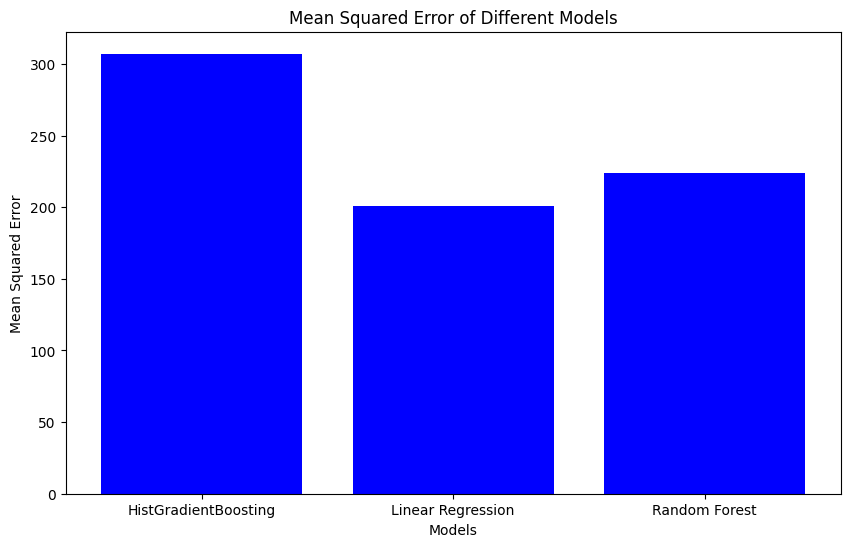

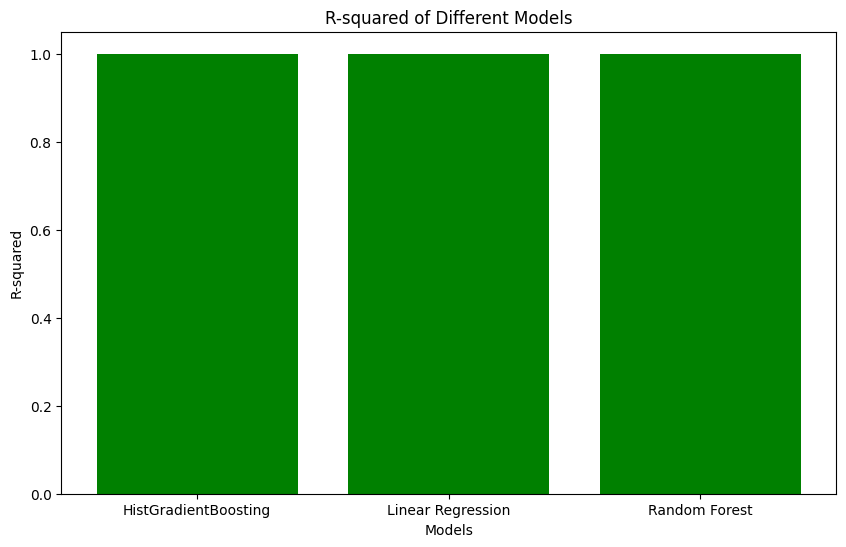

In [23]:
import matplotlib.pyplot as plt

# Names of models
models = ['HistGradientBoosting', 'Linear Regression', 'Random Forest']

# Mean Squared Error values
mse_values = [mse_gradient_reg, mse_linear_reg, mse_random_forest]

# R-squared values
r2_values = [r2_gradient_reg, r2_linear_reg, r2_random_forest]

# Plotting the Mean Squared Error
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Different Models')
plt.show()

# Plotting the R-squared values
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='green')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared of Different Models')
plt.show()
